This notebook presents five examples of synthetic data generation. The notebook uses the method explanied in the following article: Restrepo, Juan. P.; Rivera, J.C.; Laniado, H., Osorio, P; Becerra, O. Nonparametric Generation of Synthetic Data Using Copulas. Electronics 2022, 1, 0. https://doi.org/

## Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.synthetic_data_generator import generate_multivariate_data
from src.utilities.plot_comparision import scatter


## Examples

### Cubic function

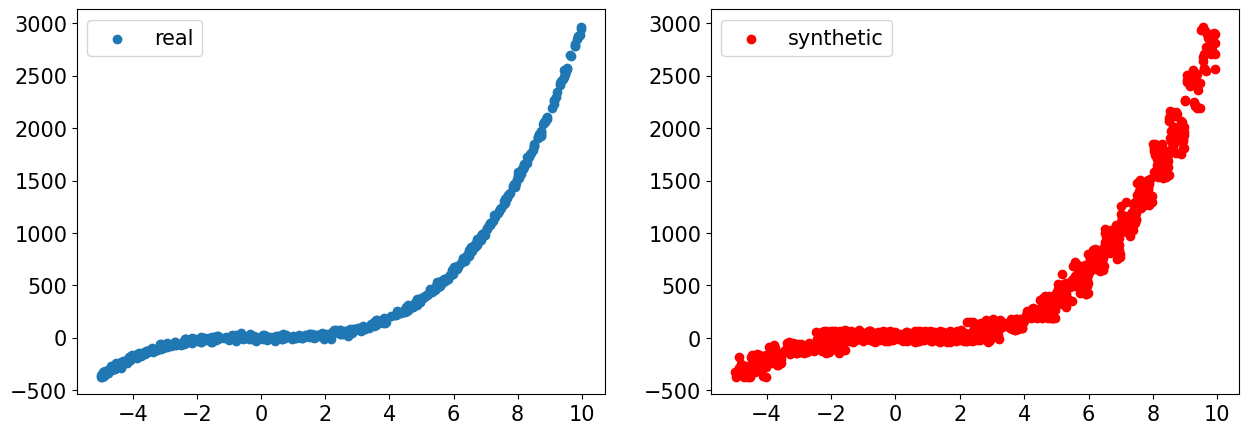

In [2]:
# Real data
X = np.random.uniform(low=-5, high=10, size=500)
Y = 3*(X**3) - 0.2*(X**2) - 0.4*X + 3 + np.random.normal(0, 16, size=len(X))

df_real = pd.DataFrame()
df_real['X'] = X
df_real['Y'] = Y

df_synthetic = generate_multivariate_data(X=df_real, bins=30, N=1000)

scatter(df_real, df_synthetic)


### 2D - Spiral

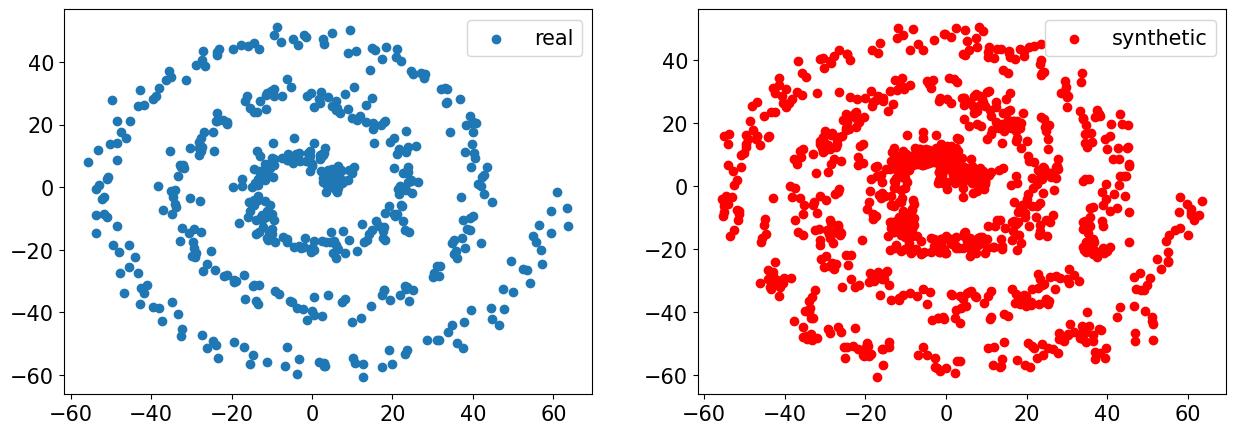

In [3]:
theta = np.array([i for i in range(0, 500, 1)]) * np.pi * 6 / 500
r = 5 + 3 * theta + np.random.normal(0, 1, 500)
X = r * np.cos(theta) + np.random.normal(0, 2, 500)
Y = r * np.sin(theta) + np.random.normal(0, 2, 500)

df_real = pd.DataFrame()
df_real['X'] = X
df_real['Y'] = Y

df_synthetic = generate_multivariate_data(X=df_real, bins=20, N=1000)

scatter(df_real, df_synthetic)


### Datasaurus

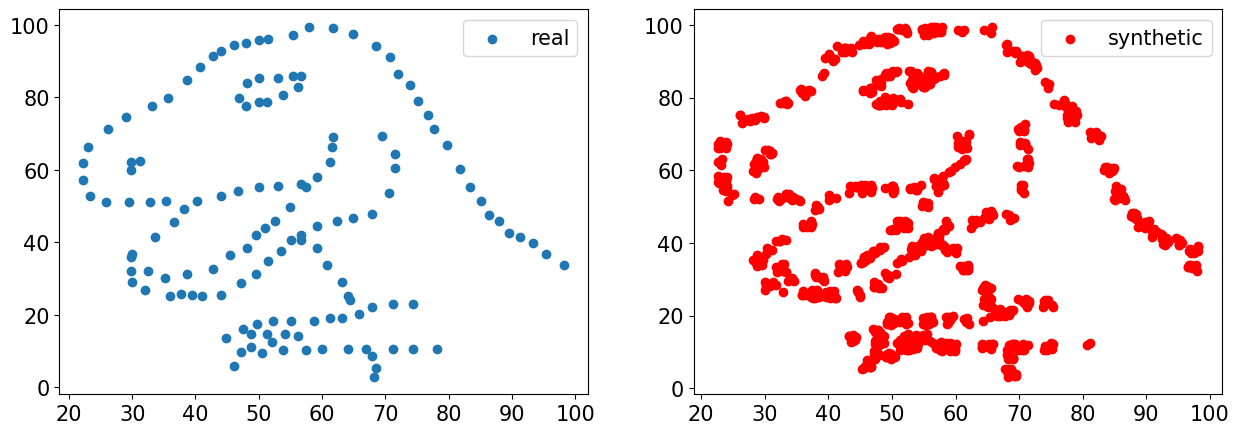

In [4]:
df_real = pd.read_csv('datasets\datasaurus_data.csv')
# datasaurus dataset was obtained from
# http://www.thefunctionalart.com/2016/08/download-datasaurus-never-trust-summary.html

df_synthetic = generate_multivariate_data(X=df_real, bins=40, N=1000)

scatter(df_real, df_synthetic)


### Tree branch

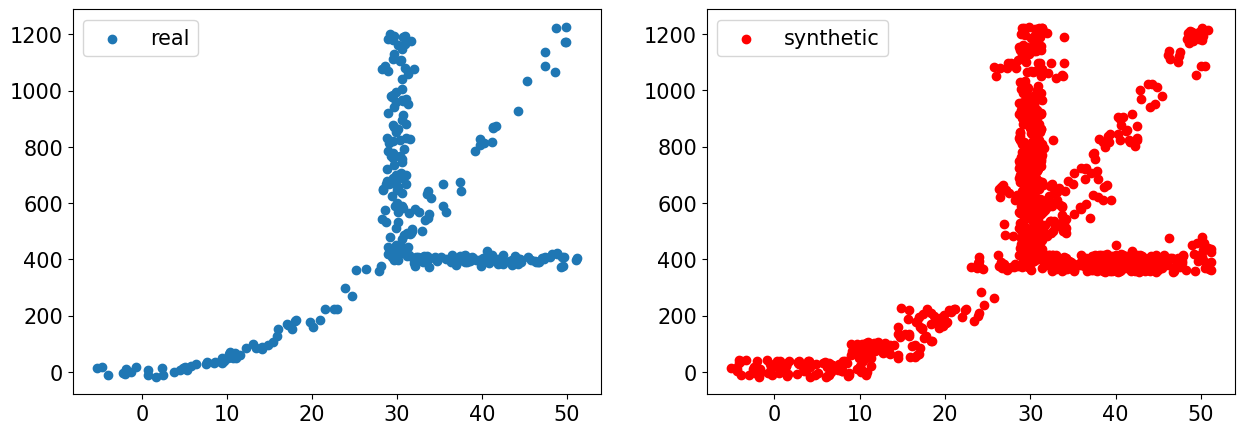

In [5]:
X = np.random.uniform(-5, 50, 100)
Y = 0.5*X**2
X1 = np.random.uniform(30, 50, 100)
Y1 = np.array([400 for i in range(100)])
X2 = np.array([30 for i in range(100)])
Y2 = np.random.uniform(400, 1200, 100)

X = np.concatenate((X, X1, X2))
Y = np.concatenate((Y, Y1, Y2))

X = X + np.random.normal(0, 1, len(X))
Y = Y + np.random.normal(0, 10, len(Y))

df_real = pd.DataFrame()
df_real['X'] = X
df_real['Y'] = Y

df_synthetic = generate_multivariate_data(X=df_real, bins=20, N=1000)

scatter(df_real, df_synthetic)


### Iris dataset

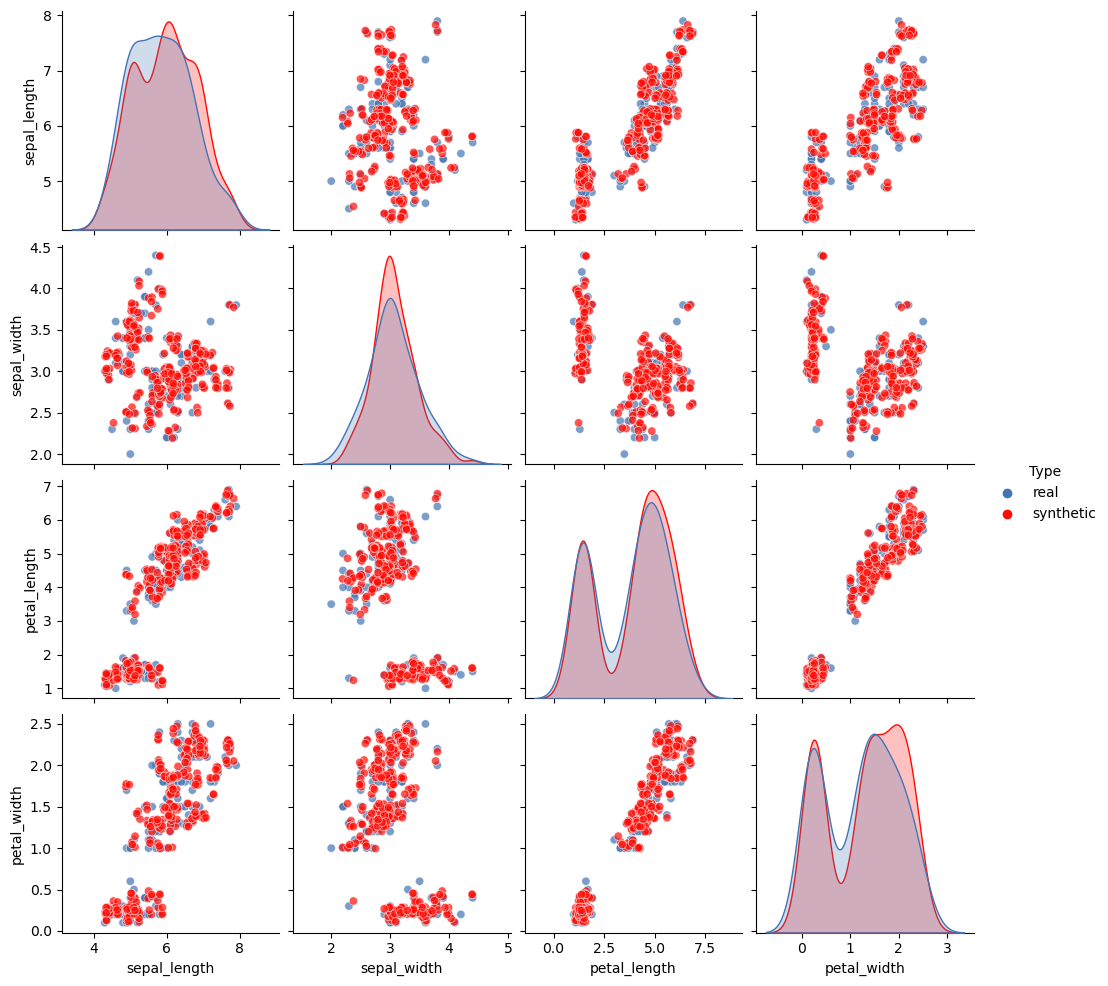

In [6]:
df_real = sns.load_dataset("iris")
df_real.drop(columns=['species'], inplace=True)

df_synthetic = generate_multivariate_data(X=df_real, bins=25, N=300)

df_real['Type'] = 'real'
df_synthetic['Type'] = 'synthetic'

df_comparision = pd.concat([df_real, df_synthetic]).reset_index(drop=True)


colors = ["#4374B3", "#FF0B04"]
sns.set_palette(sns.color_palette(colors))

sns.pairplot(df_comparision, hue="Type", diag_kind="kde", corner=False,
             diag_kws={'common_norm': False}, plot_kws={'markers': ['o', 'v'], 'alpha': 0.7})
